In [1]:
import nltk

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

In [3]:
data = pd.read_pickle('17k_apperal_data')

In [4]:
data.shape

(17593, 7)

In [23]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)


list of stop words: {'the', "you've", 'will', 'ain', 'with', 'me', 'up', 'her', 'down', 'or', 'not', "doesn't", 'again', "needn't", 'when', 'can', 'wouldn', 'they', 'there', "don't", 'my', 'itself', 'such', 'yours', 'too', 'haven', 'your', 'for', 'has', 'of', 'those', 'being', "she's", 'does', 'won', 'under', 't', 'his', 'whom', 'themselves', 'was', 'wasn', 'him', "should've", 'she', 'weren', 'which', 'theirs', 's', 'isn', "you're", 'shan', "hasn't", 'what', 'ourselves', 'all', 'most', 'just', 'having', "you'd", 'ma', "shouldn't", 'some', 'needn', 'be', 'it', 'these', 'each', "that'll", 'have', 'while', 'myself', 'further', 'during', 'is', 'yourself', 'd', 'no', 'in', 'hadn', 'above', 'nor', 'any', 'into', 'them', "hadn't", 'been', 'through', 'very', 'by', 've', 'himself', 'after', 'as', 'how', 'to', 'm', 'o', "wouldn't", 'at', 'where', 'between', "it's", 'out', 'own', 'before', "you'll", 'couldn', 'll', 'were', 'from', 'few', 're', "weren't", 'now', 'below', 'this', 'that', 'hers', "a

In [6]:
def prepocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            word = ("".join(e for e in words if e.isalnum()))
            word = word.lower()
            if not word in stop_words:
                string += word + " "
        data[column][index] = string

In [7]:
import math
import time
import re
import os

In [8]:

for index, row in data.iterrows():
    prepocessing(row['title'], index, 'title')


In [9]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique 100 cotton special olympics wor...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,supernatural chibis sam dean castiel neck tshi...,$7.39
43,B0079BMKDS,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,APPAREL,featherlite ladies silky smooth pique white xl,$13.53


In [10]:
data.shape

(17593, 7)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(data['title'])

In [12]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances

In [13]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack


In [33]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [14]:
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [15]:
# Misc. Utility functions.
def display_img(url,ax,fig):
    # we get the url of the apparel and download it
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    # we will display it in notebook 
    plt.imshow(img)
    
def plot_heatmap(keys, values, labels, url, text):
        # keys: list of words of recommended title
        # values: len(values) ==  len(keys), values(i) represents the occurence of the word keys(i)
        # labels: len(labels) == len(keys), the values of labels depends on the model we are using
                # if model == 'bag of words': labels(i) = values(i)
                # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
                # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
        # url : apparel's url

        # we will devide the whole figure into two parts
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        
        # 1st, ploting heat map that represents the count of commonly ocurred words in title2
        ax = plt.subplot(gs[0])
        # it displays a cell in white color if the word is intersection(lis of words of title1 and list of words of title2), in black if not
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) # set that axis labels as the words of title
        ax.set_title(text) # apparel title
        
        # 2nd, plotting image of the the apparel
        ax = plt.subplot(gs[1])
        # we don't want any grid lines for image and no labels on x-axis and y-axis
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # we call dispaly_img based with paramete url
        display_img(url, ax, fig)
        
        # displays combine figure ( heat map and image together)
        plt.show()
    
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):

    # doc_id : index of the title1
    # vec1 : input apparels's vector, it is of a dict type {word:count}
    # vec2 : recommended apparels's vector, it is of a dict type {word:count}
    # url : apparels image url
    # text: title of recomonded apparel (used to keep title of image)
    # model, it can be any of the models, 
        # 1. bag_of_words
        # 2. tfidf
        # 3. idf

    # we find the common words in both titles, because these only words contribute to the distance between two title vec's
    intersection = set(vec1.keys()) & set(vec2.keys()) 

    # we set the values of non intersecting words to zero, this is just to show the difference in heatmap
    for i in vec2:
        if i not in intersection:
            vec2[i]=0

    # for labeling heatmap, keys contains list of all words in title2
    keys = list(vec2.keys())
    #  if ith word in intersection(lis of words of title1 and list of words of title2): values(i)=count of that word in title2 else values(i)=0 
    values = [vec2[x] for x in vec2.keys()]
    
    # labels: len(labels) == len(keys), the values of labels depends on the model we are using
        # if model == 'bag of words': labels(i) = values(i)
        # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
        # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))

    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            # tfidf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # tfidf_title_features[doc_id, index_of_word_in_corpus] will give the tfidf value of word in given document (doc_id)
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            # idf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # idf_title_features[doc_id, index_of_word_in_corpus] will give the idf value of word in given document (doc_id)
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)

    plot_heatmap(keys, values, labels, url, text)



def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    # words stores list of all words in given string, you can try 'words = text.split()' this will also gives same result
    return Counter(words) # Counter counts the occurence of each word in list, it returns dict type object {word1:count}


def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)

    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)

## BAG OF WORDS

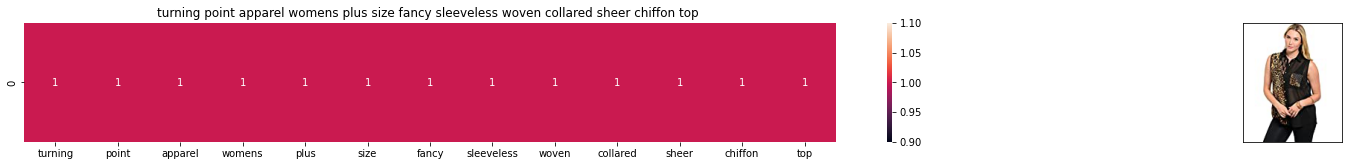

Asin number of apparel : B00NVT44J0
Cosine similarity with given image : 0.9999999999999998


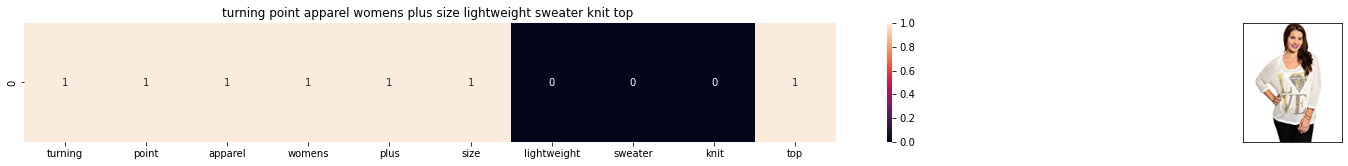

Asin number of apparel : B00NVLUI9S
Cosine similarity with given image : 0.6139406135149206


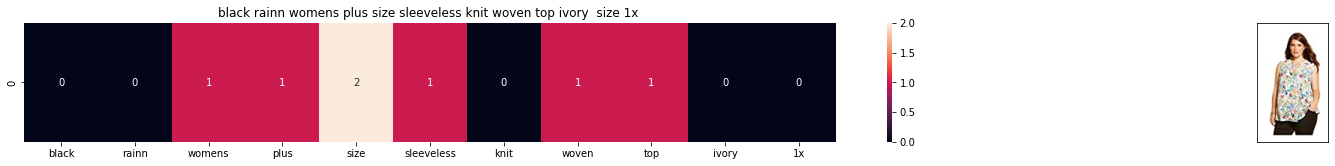

Asin number of apparel : B01N6UF0ZA
Cosine similarity with given image : 0.5188745216627709


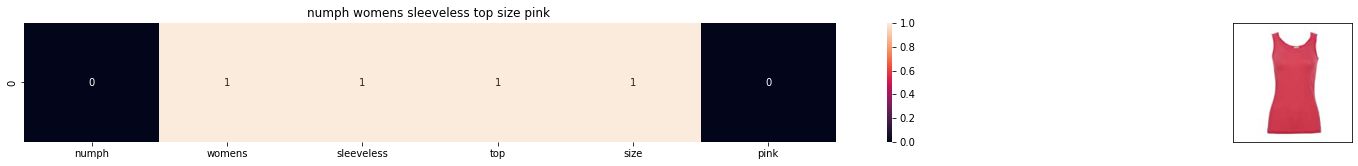

Asin number of apparel : B00ICOQYY2
Cosine similarity with given image : 0.45291081365783836


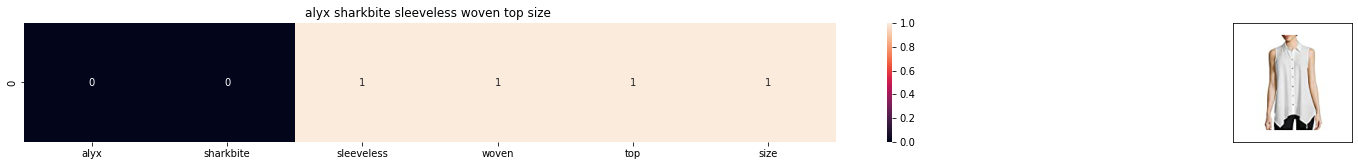

Asin number of apparel : B01MQV2X52
Cosine similarity with given image : 0.45291081365783836


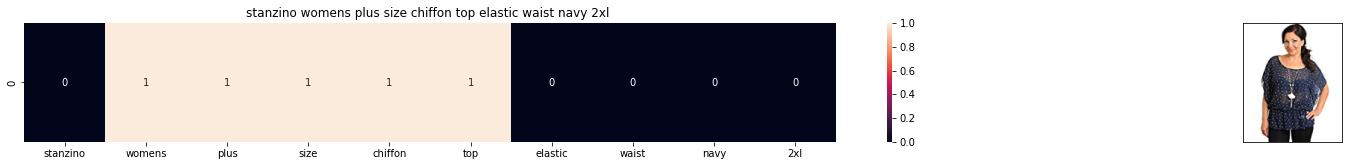

Asin number of apparel : B00CA91AVW
Cosine similarity with given image : 0.4385290096535146


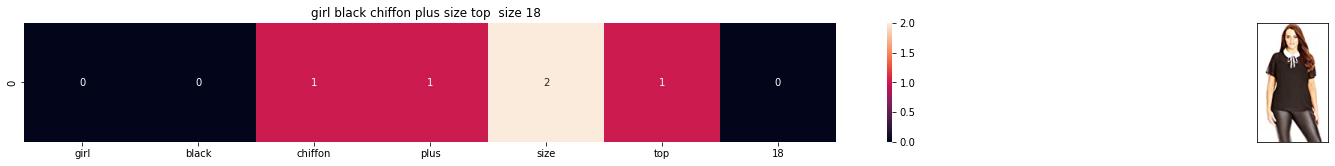

Asin number of apparel : B01MPXEV1J
Cosine similarity with given image : 0.4385290096535146


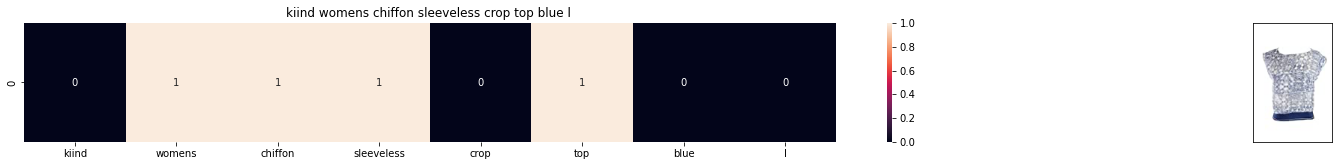

Asin number of apparel : B00WH0NFI0
Cosine similarity with given image : 0.4193139346887673


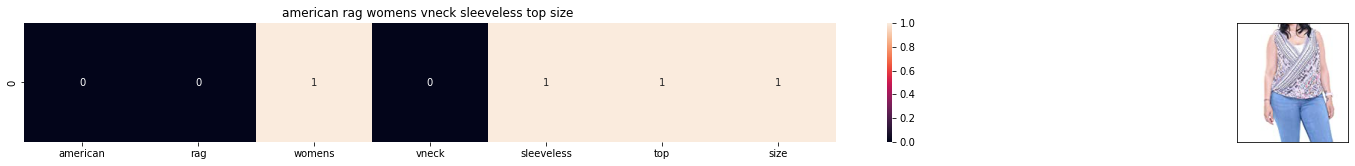

Asin number of apparel : B071KVQQL4
Cosine similarity with given image : 0.4193139346887673


In [16]:
def bag_of_words_model(doc_id):
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id], metric='cosine')
    indices = np.argsort(pairwise_dist.flatten())[0:9]
    pdists  = np.sort(pairwise_dist.flatten())[0:9]
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('Asin number of apparel :',data['asin'].loc[df_indices[i]])
        print ('Cosine similarity with given image :', 1-pdists[i])
        print('='*125)
bag_of_words_model(6156)

## tf-idf

In [17]:
tfidf_title_vectorizer = TfidfVectorizer(norm='l2',min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])

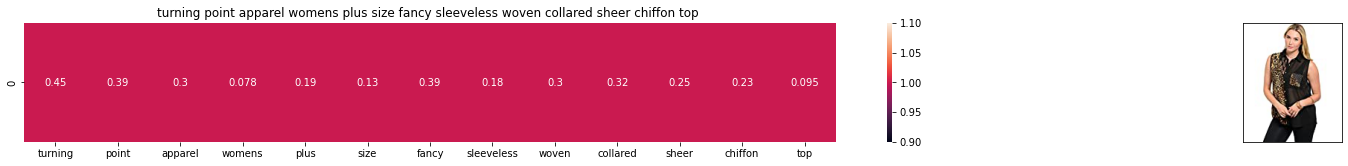

Asin number of apparel : B00NVT44J0
Cosine similarity with given image : 1.0


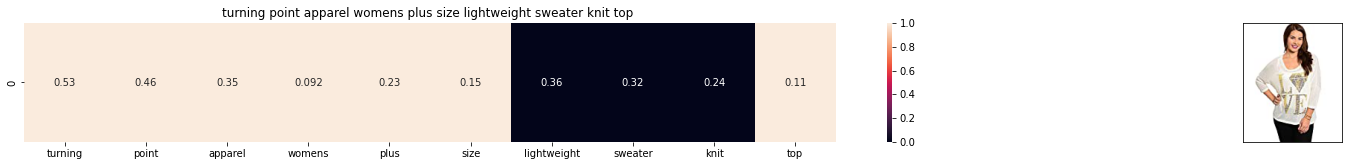

Asin number of apparel : B00NVLUI9S
Cosine similarity with given image : 0.6034722278622803


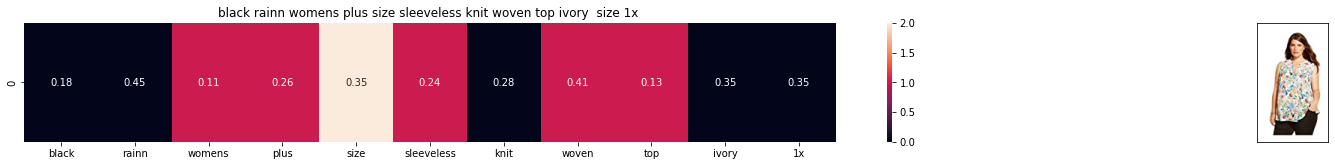

Asin number of apparel : B01N6UF0ZA
Cosine similarity with given image : 0.28009206309491796


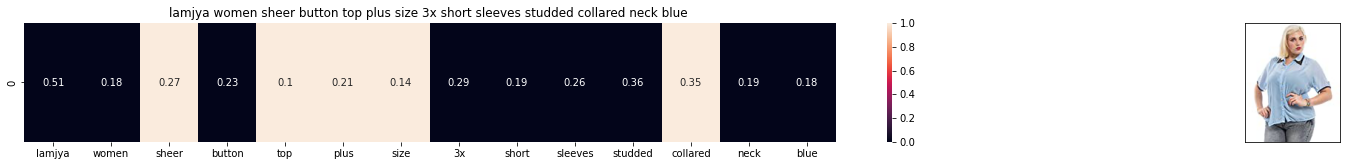

Asin number of apparel : B072MB5854
Cosine similarity with given image : 0.24755226403320063


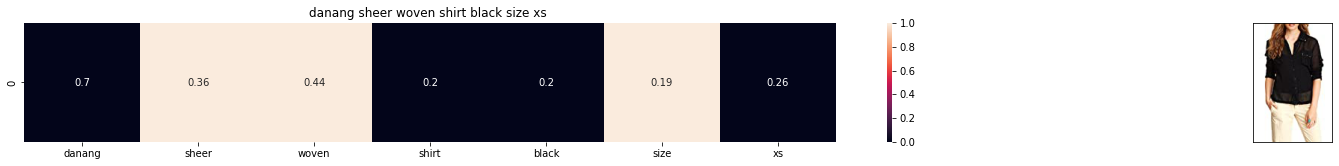

Asin number of apparel : B06XKZP7NX
Cosine similarity with given image : 0.24596369236462667


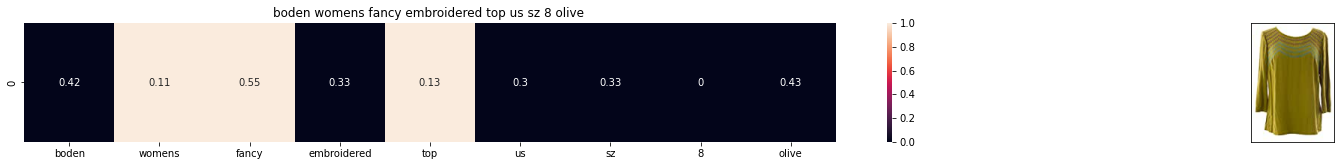

Asin number of apparel : B01JMB1TWU
Cosine similarity with given image : 0.23662002496694368


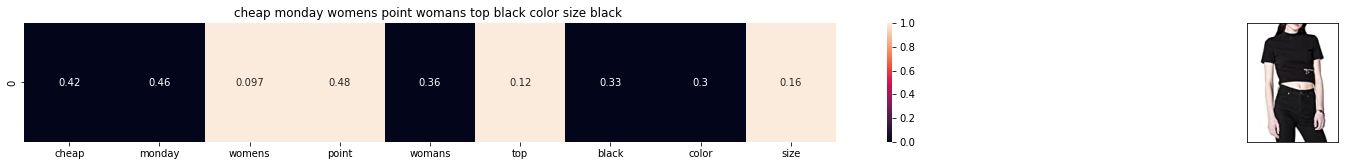

Asin number of apparel : B01H36VNJA
Cosine similarity with given image : 0.22466341675156842


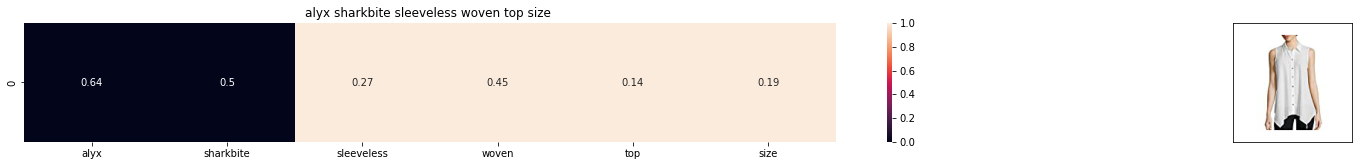

Asin number of apparel : B01MQV2X52
Cosine similarity with given image : 0.2218711768496583


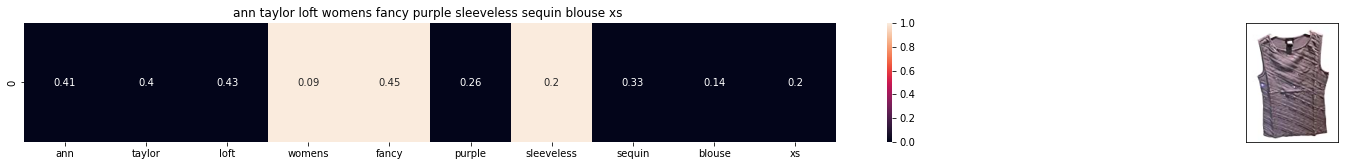

Asin number of apparel : B07485Y5MN
Cosine similarity with given image : 0.22003098925338904


In [18]:
def tfidf_model(doc_id):
    pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[doc_id], metric='cosine')
    indices = np.argsort(pairwise_dist.flatten())[0:9]
    pdists  = np.sort(pairwise_dist.flatten())[0:9]
    df_indices = list(data.index[indices])
    for i in range(0,len(indices)):
        get_result(indices[i], data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'tfidf')
        print('Asin number of apparel :',data['asin'].loc[df_indices[i]])
        print ('Cosine similarity with given image :', 1-pdists[i])
        print('='*125)
tfidf_model(6156)

##  Using idf of words in title of apparels

In [19]:
idf_title_vectorizer = CountVectorizer()
idf_title_features = idf_title_vectorizer.fit_transform(data['title'])

In [20]:
def n_containing(word):
    return sum(1 for blob in data['title'] if word in blob.split())

def idf(word):
    return math.log(data.shape[0] / (n_containing(word)))

In [21]:

idf_title_features  = idf_title_features.astype(np.float)

for i in idf_title_vectorizer.vocabulary_.keys():
    idf_val = idf(i)
    for j in idf_title_features[:, idf_title_vectorizer.vocabulary_[i]].nonzero()[0]:
        idf_title_features[j,idf_title_vectorizer.vocabulary_[i]] = idf_val

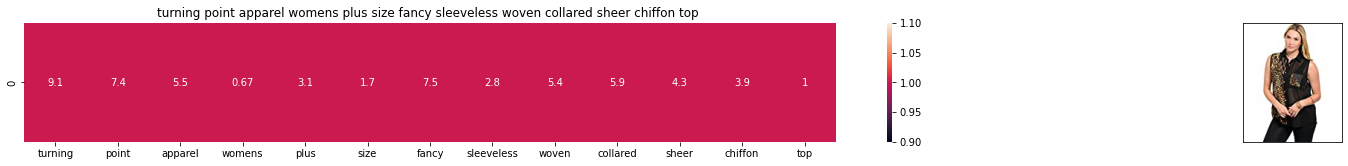

Asin number of apparel : B00NVT44J0
Cosine similarity with given image : 1.0


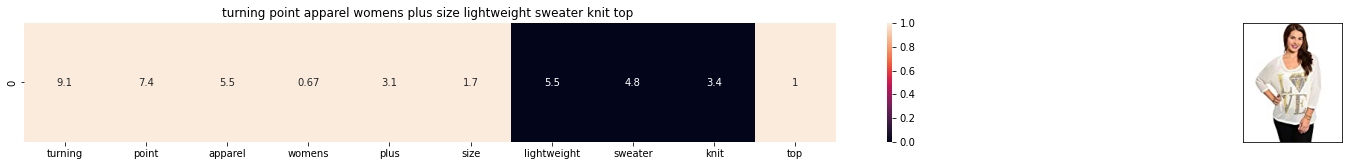

Asin number of apparel : B00NVLUI9S
Cosine similarity with given image : 0.6237066230707522


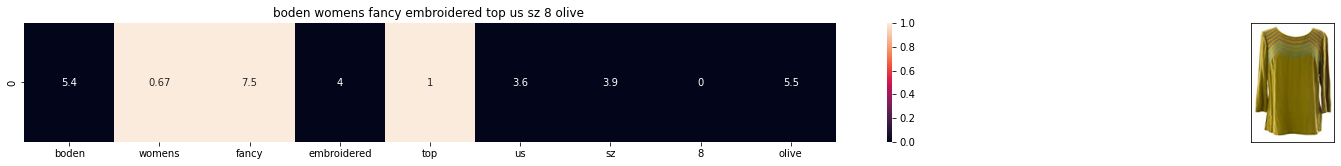

Asin number of apparel : B01JMB1TWU
Cosine similarity with given image : 0.24386114237002066


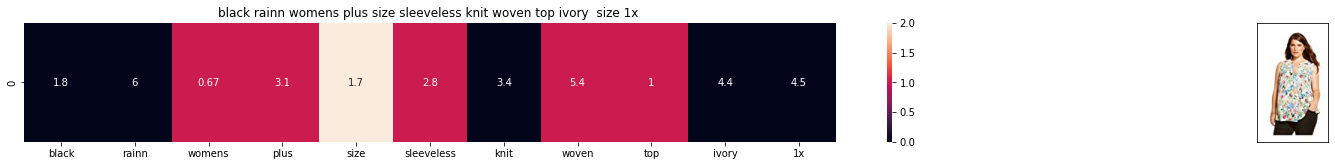

Asin number of apparel : B01N6UF0ZA
Cosine similarity with given image : 0.23207059411710895


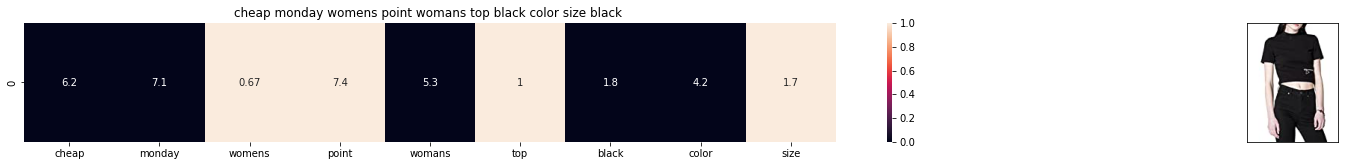

Asin number of apparel : B01H36VNJA
Cosine similarity with given image : 0.22715283199414293


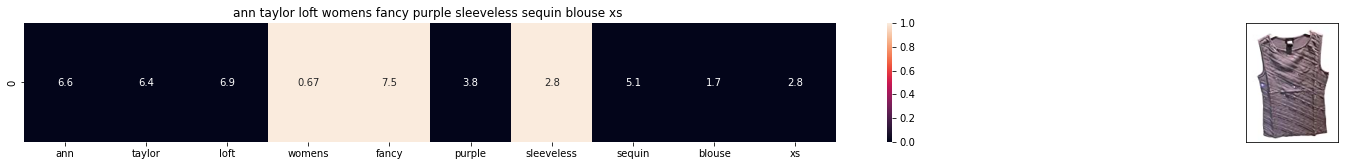

Asin number of apparel : B07485Y5MN
Cosine similarity with given image : 0.2199228329955255


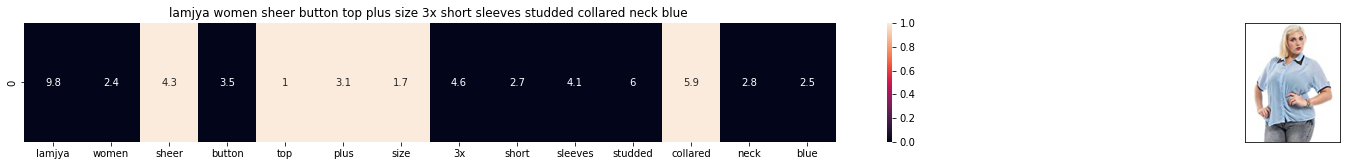

Asin number of apparel : B072MB5854
Cosine similarity with given image : 0.2186125445282886


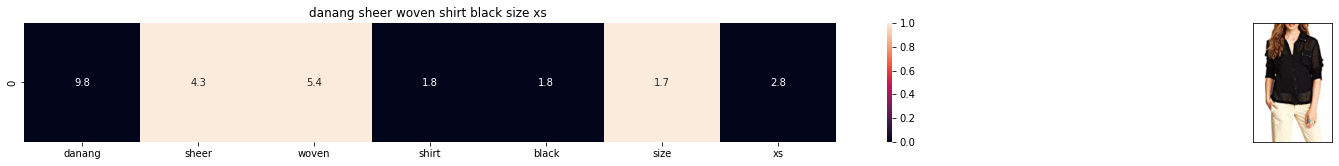

Asin number of apparel : B06XKZP7NX
Cosine similarity with given image : 0.21532084941190743


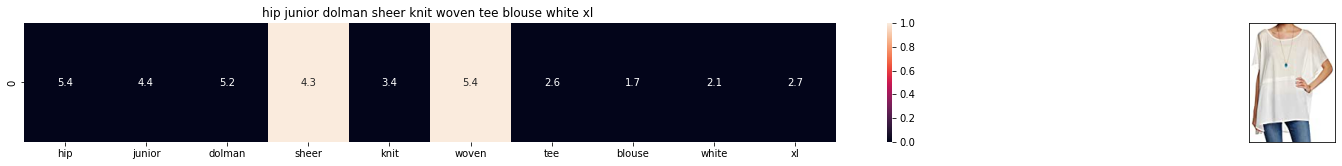

Asin number of apparel : B074P9LB8J
Cosine similarity with given image : 0.2046415814068554


In [22]:
def idf_model(doc_id):
    pairwise_dist = pairwise_distances(idf_title_features,idf_title_features[doc_id], metric='cosine')
    indices = np.argsort(pairwise_dist.flatten())[0:9]
    pdists  = np.sort(pairwise_dist.flatten())[0:9]
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'idf')
        print('Asin number of apparel :',data['asin'].loc[df_indices[i]])
        print ('Cosine similarity with given image :', 1-pdists[i])
        print('='*125)
idf_model(6156)

In [23]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [2]:
pip install gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.24
    Uninstalling Cython-0.29.24:
      Successfully uninstalled Cython-0.29.24
Note: you may need to restart the kernel to use updated packages.


In [ ]:
model = KeyedVectors.load_word2vec_format('./models/GoogleNews-vectors-negative300.bin', binary=True)

In [30]:
model = Word2Vec()

In [31]:
def get_word_vec(sentance, doc_id, m_name):
    # sentance : title of the apparel
    # doc_id: document id in our corpus
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)
    vec = []
    for i in sentance.split():
        if i in vocab:
            if m_name == 'weighted' and i in  idf_title_vectorizer.vocabulary_:
                vec.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[i]] * model[i])
            elif m_name == 'avg':
                vec.append(model[i])
        else:
            # if the word in our courpus is not there in the google word2vec corpus, we are just ignoring it
            vec.append(np.zeros(shape=(300,)))
    # we will return a numpy array of shape (#number of words in title * 300 ) 300 = len(w2v_model[word])
    # each row represents the word2vec representation of each word (weighted/avg) in given sentance 
    return  np.array(vec)

def get_distance(vec1, vec2):
    # vec1 = np.array(#number_of_words_title1 * 300), each row is a vector of length 300 corresponds to each word in give title
    # vec2 = np.array(#number_of_words_title2 * 300), each row is a vector of length 300 corresponds to each word in give title
    
    final_dist = []
    # for each vector in vec1 we caluclate the distance(euclidean) to all vectors in vec2
    for i in vec1:
        dist = []
        for j in vec2:
            # np.linalg.norm(i-j) will result the euclidean distance between vectors i, j
            dist.append(np.linalg.norm(i-j))
        final_dist.append(np.array(dist))
    # final_dist = np.array(#number of words in title1 * #number of words in title2)
    # final_dist[i,j] = euclidean distance between vectors i, j
    return np.array(final_dist)


def heat_map_w2v(sentance1, sentance2, url, doc_id1, doc_id2, model):
    #s1_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s1_vec = get_word_vec(sentance1, doc_id1, model)
    #s2_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s2_vec = get_word_vec(sentance2, doc_id2, model)

    # s1_s2_dist = np.array(#number of words in title1 * #number of words in title2)
    # s1_s2_dist[i,j] = euclidean distance between words i, j
    s1_s2_dist = get_distance(s1_vec, s2_vec)

    
    
    # devide whole figure into 2 parts 1st part displays heatmap 2nd part displays image of apparel
    gs = gridspec.GridSpec(2, 2, width_ratios=[4,1],height_ratios=[2,1]) 
    fig = plt.figure(figsize=(15,15))
    
    ax = plt.subplot(gs[0])
    # ploting the heap map based on the pairwise distances
    ax = sns.heatmap(np.round(s1_s2_dist,4), annot=True)
    # set the x axis labels as recommended apparels title
    ax.set_xticklabels(sentance2.split())
    # set the y axis labels as input apparels title
    ax.set_yticklabels(sentance1.split())
    # set title as recommended apparels title
    ax.set_title(sentance2)
    
    ax = plt.subplot(gs[1])
    # we remove all grids and axis labels for image
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    display_img(url, ax, fig)
    
    plt.show()

In [32]:
vocab = model.wv.key_to_index.keys()
# this function will add the vectors of each word and returns the avg vector of given sentance
def avg_build_vec(sentence, num_features, doc_id, m_name):
    # sentace: its title of the apparel
    # num_features: the lenght of word2vec vector, its values = 300
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)

    featureVec = np.zeros((num_features,), dtype="float32")
    # we will intialize a vector of size 300 with all zeros
    # we add each word2vec(wordi) to this fetureVec
    nwords = 0
    
    for word in sentence.split():
        nwords += 1
        if word in vocab:
            if m_name == 'weighted' and word in  idf_title_vectorizer.vocabulary_:
                featureVec = np.add(featureVec, idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[word]] * model[word])
            elif m_name == 'avg':
                featureVec = np.add(featureVec, model[word])
    if(nwords>0):
        featureVec = np.divide(featureVec, nwords)
    # returns the avg vector of given sentance, its of shape (1, 300)
    return featureVec

In [33]:
import numpy as np

In [34]:
doc_id = 0
w2v_title = []
# for every title we build a avg vector representation
for i in data['title']:
    w2v_title.append(avg_build_vec(i, 300, doc_id,'avg'))
    doc_id += 1

# w2v_title = np.array(# number of doc in courpus * 300), each row corresponds to a doc 
w2v_title = np.array(w2v_title)


In [35]:
def avg_w2v_model(doc_id):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(w2v_title, w2v_title[doc_id].reshape(1,-1), metric='cosine')

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:9]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:9]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0, len(indices)):
        heat_map_w2v(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i], 'avg')
        print('Asin number of apparel :',data['asin'].loc[df_indices[i]])
        print ('Cosine similarity with given image :', 1-pdists[i])
        print('='*125)

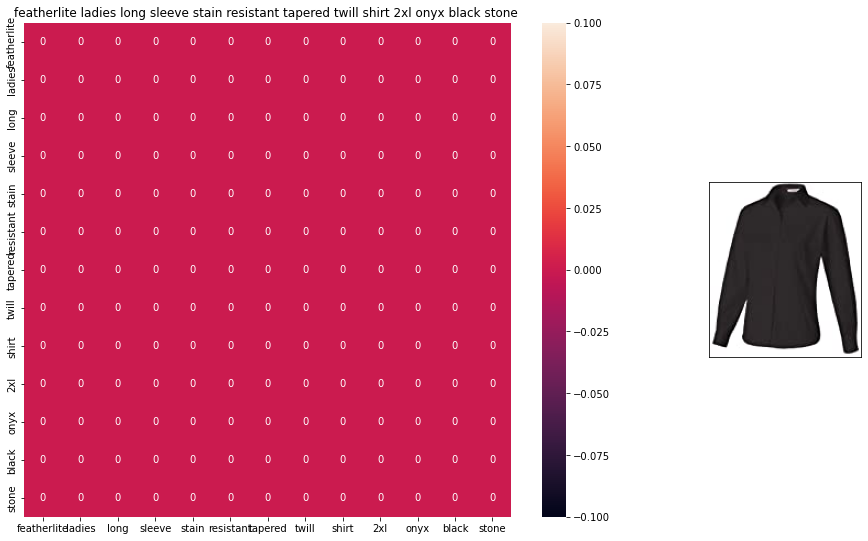

Asin number of apparel : B004GSI2OS
Cosine similarity with given image : 0.0


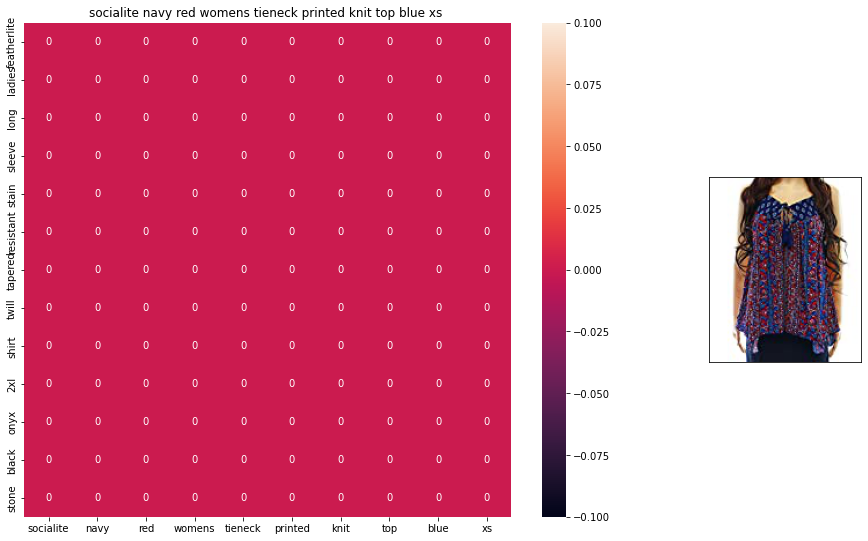

Asin number of apparel : B072XM5T86
Cosine similarity with given image : 0.0


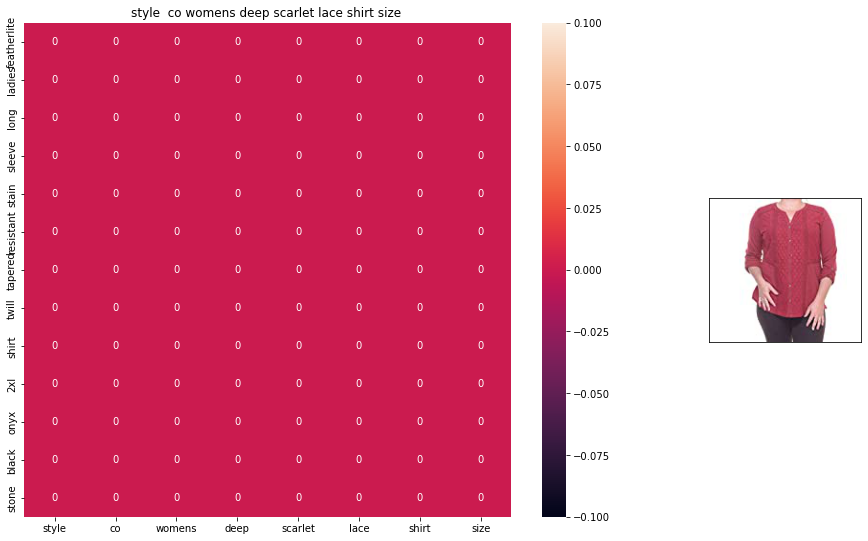

Asin number of apparel : B07343D7VK
Cosine similarity with given image : 0.0


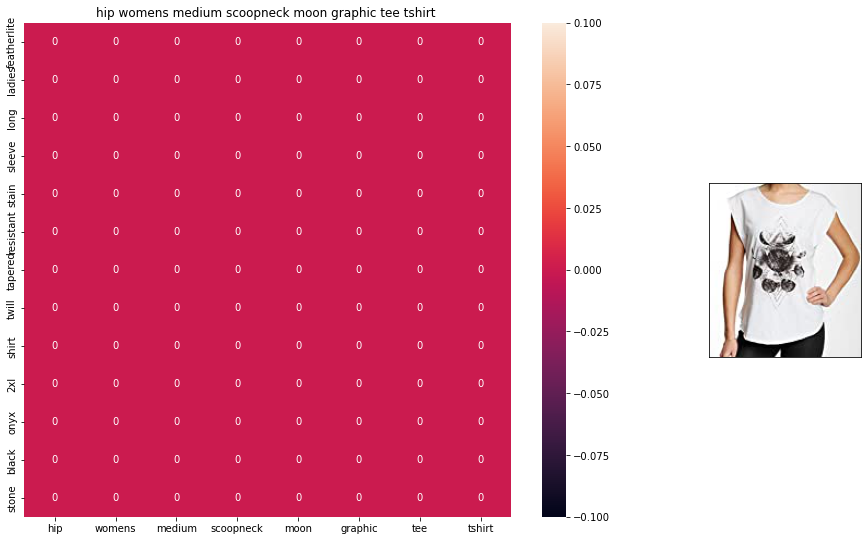

Asin number of apparel : B0758ZPKX5
Cosine similarity with given image : 0.0


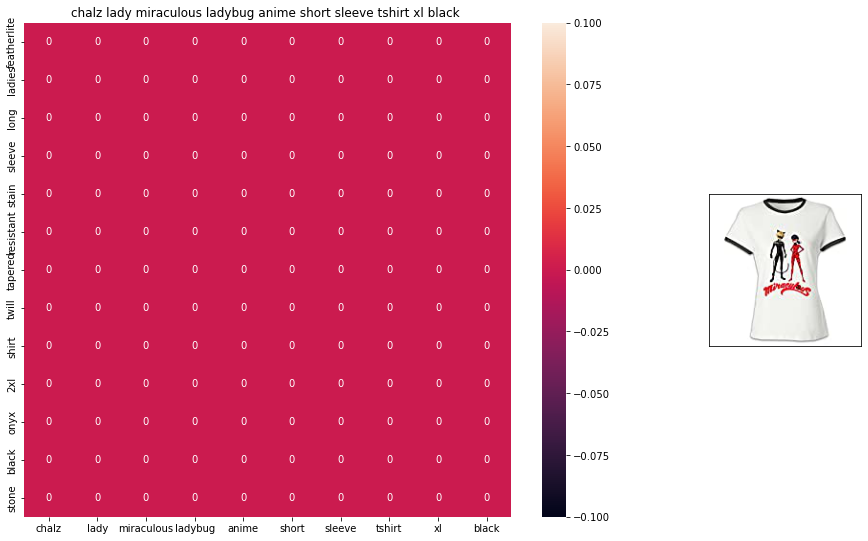

Asin number of apparel : B01GRR20DE
Cosine similarity with given image : 0.0


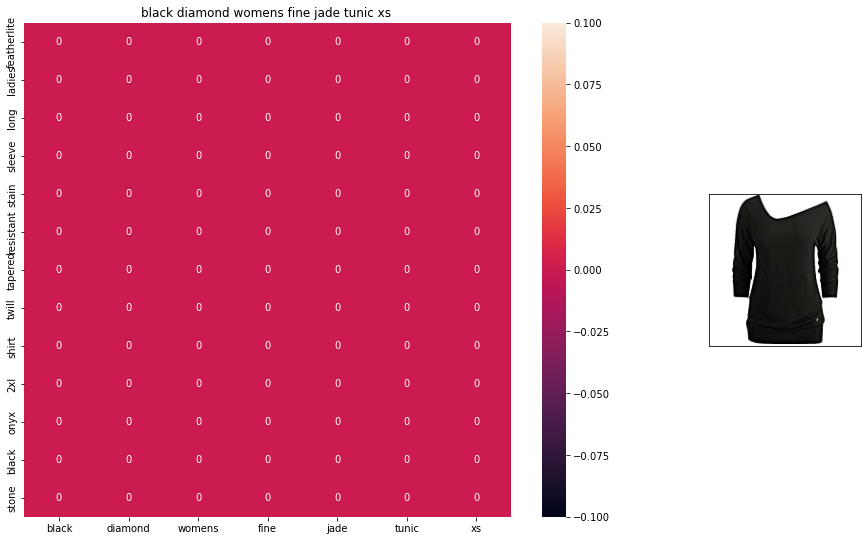

Asin number of apparel : B00LTQMGYC
Cosine similarity with given image : 0.0


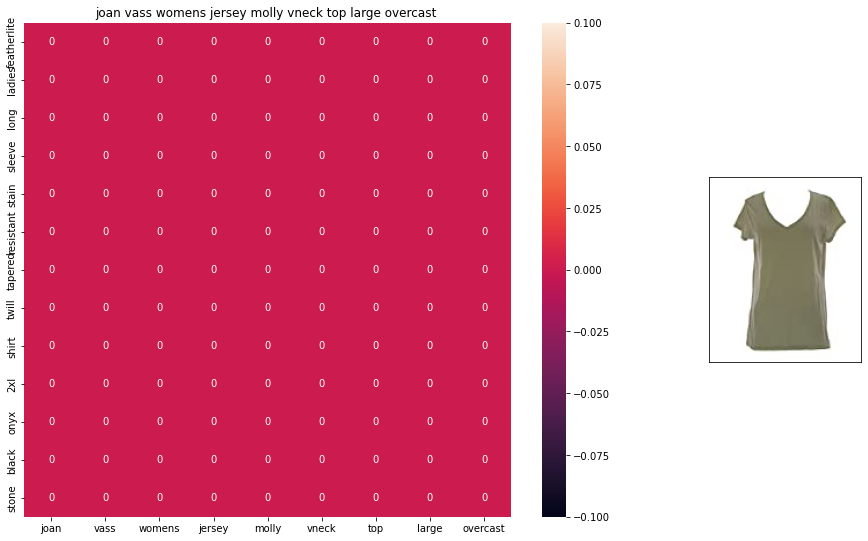

Asin number of apparel : B015DCAUVI
Cosine similarity with given image : 0.0


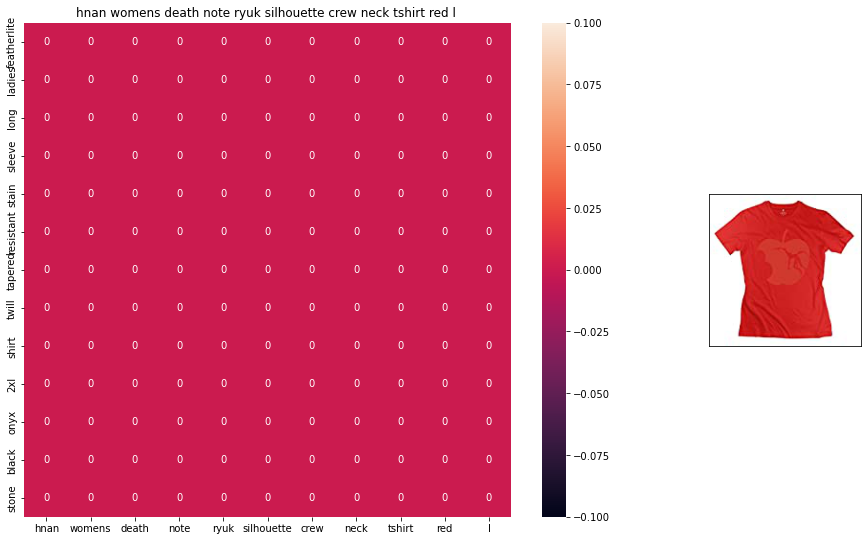

Asin number of apparel : B011I81HEU
Cosine similarity with given image : 0.0


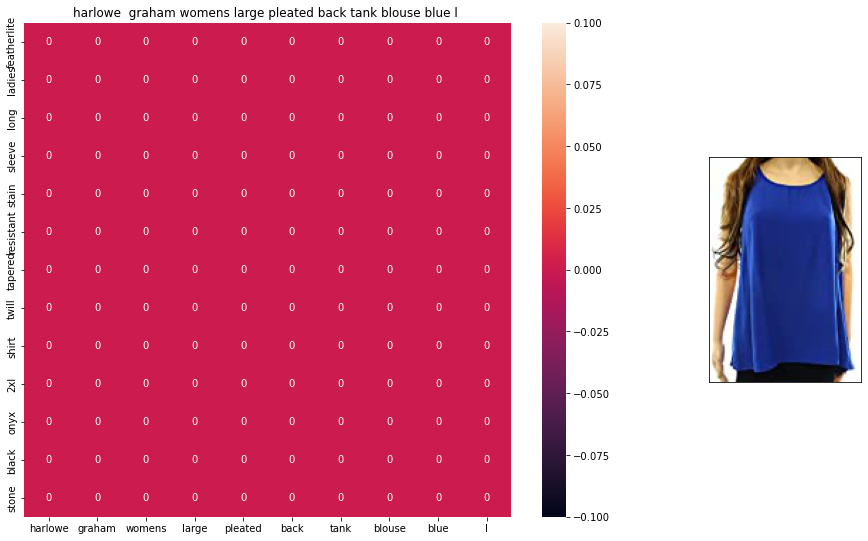

Asin number of apparel : B072JK5VC9
Cosine similarity with given image : 0.0


In [36]:
avg_w2v_model(6156)

In [45]:
brands = [if x: x.replace(" ", "-") for x in data['brand'].values]
types = [if x: x.replace(" ", "-") for x in data['product_type_name'].values]
colors = [if x: x.replace(" ", "-") for x in data['color'].values]

brand_vectorizer = CountVectorizer()
brand_features = brand_vectorizer.fit_transform(brands)

type_vectorizer = CountVectorizer()
type_features = type_vectorizer.fit_transform(types)

color_vectorizer = CountVectorizer()
color_features = color_vectorizer.fit_transform(colors)

extra_features = hstack((brand_features, type_features, color_features)).tocsr()

SyntaxError: invalid syntax (Temp/ipykernel_46764/2263381398.py, line 1)

In [44]:
brands = []
for x in data['brand']:
    if x:
        if " " in x:
           brands.append(x.replace(" ", "-") )
        else:
            brands.append(x)
    else:
        brands.append(x)
    

In [ ]:
br